# Environment setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Getting all data.

In [2]:
train=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")
submission=pd.read_csv("../input/titanic/gender_submission.csv")

# Exploring the Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.size , train.shape

(10692, (891, 12))

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Gender/sex analysis

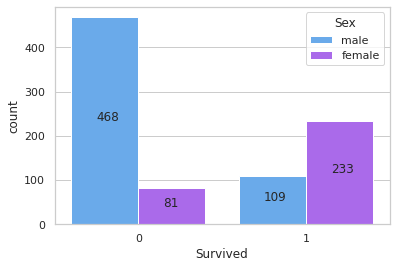

In [8]:
ax = sns.countplot(x = train["Survived"] , hue= train["Sex"] , palette= "cool")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()/2))
plt.show()

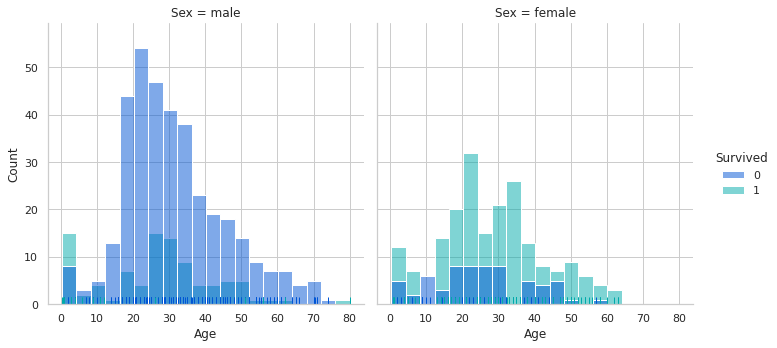

In [9]:
ax = sns.displot(data=train, x="Age", hue="Survived" , col="Sex",kind = "hist"
                 ,rug= True ,palette= "winter")

### Age analysis

<AxesSubplot:xlabel='Age'>

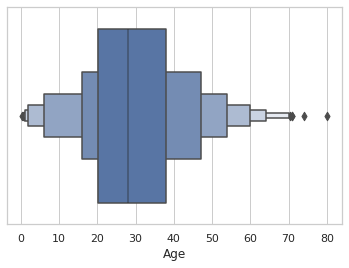

In [10]:
sns.boxenplot(x= 'Age' , data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

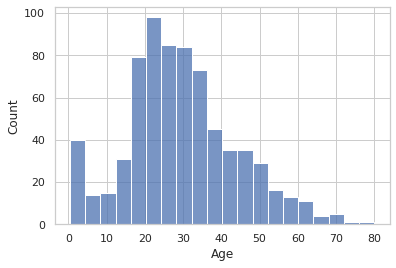

In [11]:
sns.histplot(data = train ,x = 'Age' )

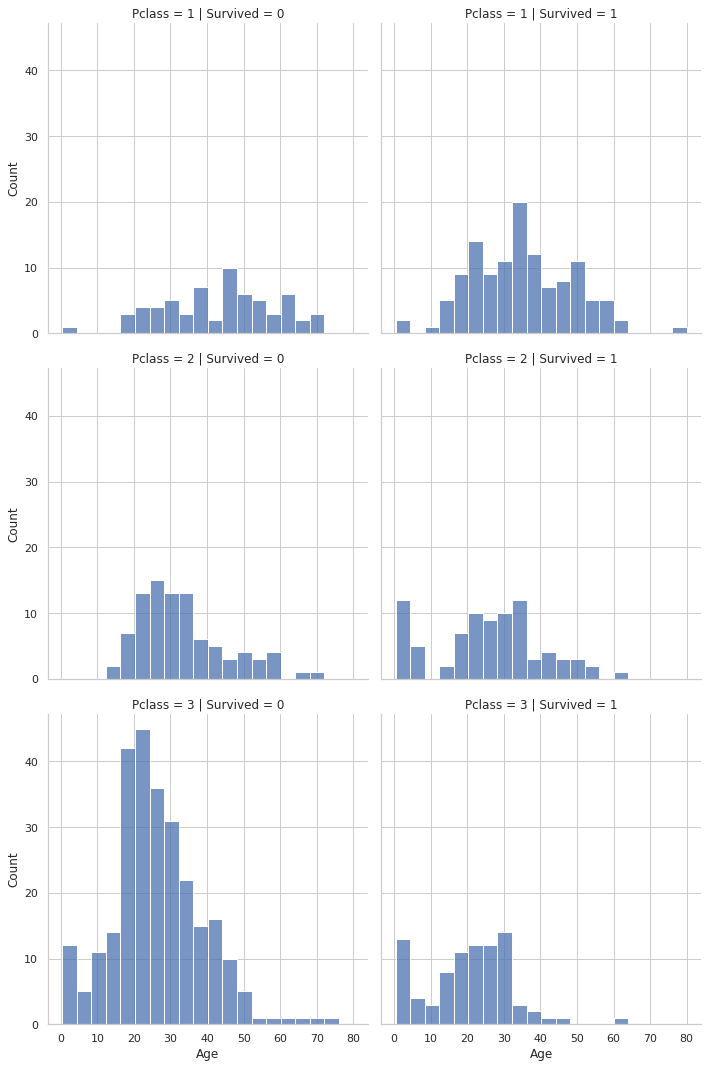

In [12]:
ax = sns.displot(data=train, x="Age", col="Survived" , row = "Pclass");

### Cheking and fixing null values

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train.drop(["Cabin"],axis = 1,inplace=True)

In [15]:
train['Age'].fillna(value = train["Age"].mean(), inplace = True)

In [16]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train["Embarked"].fillna(value = 'S' , inplace = True)
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
test.drop(["Cabin"],axis = 1 , inplace = True)

In [20]:
test['Age'].fillna(value = test["Age"].mean(), inplace = True)
test["Fare"].fillna(value = test["Fare"].mean(),inplace = True)

In [21]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# ML model

## Getting features and target value.

In [23]:
X_train = train.drop(["Survived"],axis = 1)
X_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [24]:
Y_train = train["Survived"]
Y_train[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

## transforming data so that we can use it for model training

In [25]:
X_train.drop(["Name","Ticket"],axis=1,inplace =True )
X_train.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [26]:
X_data = X_train.drop(["PassengerId"],axis = 1)

In [27]:
test.drop(["Name","Ticket"],axis=1,inplace =True)
test_data = test.drop(["PassengerId"],axis=1)

In [28]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [29]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Pclass", "Sex", "Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_data) # fit and transform the training data


In [30]:
# Check transformed and filled X_train
transformed_X_train

array([[ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 71.2833],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.75  ]])

In [31]:
test_transformed = transformer.fit_transform(test_data)

In [32]:
test_transformed

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

## Using sklearn and Randomforestclassification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
Clf = RandomForestClassifier()

In [35]:
Clf.fit(transformed_X_train,Y_train)

RandomForestClassifier()

In [36]:
Clf.score(test_transformed,submission.drop(["PassengerId"],axis=1))

0.7990430622009569

In [37]:
predictions = Clf.predict(test_transformed)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)